In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


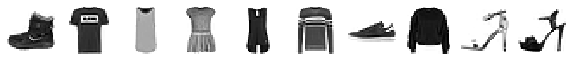

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [3]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

# imshow() : 함수는 이미지를 사이즈에 맞게 보여줍니다.
for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

print([train_target[i] for i in range(10)])

# return_counts : 각각 건수의 누적개수
print(np.unique(train_target, return_counts = True))

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

# 255 : 정수 데이터 표준화 색상 값 0 ~ 255
# 255로 나누어 0, 1로 표현(흑백)
train_scaled = train_input / 255.0 # 스케일링

# 차원에 -1 있으면 무시해도 됨.
# sgd는 2차원을 다루지 못함 -> 1차원으로 변환해야 함.
# 2번째 특성 X 3번째 특성 = 784 이미지 특색
train_scaled = train_scaled.reshape(-1, 28*28) # 1차원으로 변환
# reshape : 차원을 변경 할때 사용

print(train_scaled.shape)

# max_iter = epoch (반복횟수) -> 늘린다고 성능이 계속 향상 되지 X
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
#               로지스틱 손실함수

# cross_validate : 교차검증
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

(60000, 784)
0.8192833333333333


In [5]:
# softmax가 sigmoid보다 낫다.
# pytorch도 다뤄보는게 좋음.
# 케라스 -> tf을 간결하게 해줌.
# tf 2.0 부터는 케라스가 포함

In [6]:
from tensorflow import keras
# 딥러닝은 교차 검증X 

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                      train_target,
                                                                     test_size = 0.2,
                                                                     random_state = 42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

# 은닉층이 되려면 은닉층 parameter을 넣어야 한다.
# dense가 여러개면 출력층 + 은닉층 개념은 맞다.
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784, ))
model = keras.Sequential(dense)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [7]:
# sparse -> 원-핫 인코딩
model.compile(loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [8]:
model.fit(train_scaled, train_target, epochs= 5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.6103 - accuracy: 0.7918
Epoch 2/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4805 - accuracy: 0.8387
Epoch 3/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4547 - accuracy: 0.8488
Epoch 4/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4445 - accuracy: 0.8532
Epoch 5/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4367 - accuracy: 0.8553


In [9]:
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4487453178962072, 0.85008335]